In [2]:
%load_ext autoreload

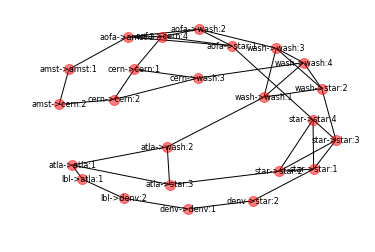

with servers


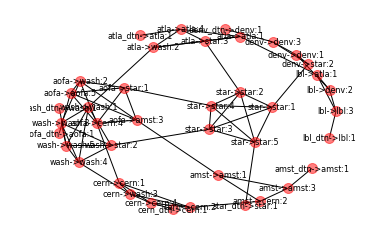

In [60]:
%aimport sim
%autoreload 2
from sim import Topology, Endpoint

topo = Topology("ESnet SDN Testbed Topology", ticks_per_sec=100)

topo.add_routers(['lbl','denv','atla','wash','aofa','amst','cern','star'])
topo.add_link(router_a='lbl',router_b='atla',capacity=10000,latency=80)
topo.add_link(router_a='lbl',router_b='denv',capacity=10000,latency=50)
topo.add_link(router_a='denv',router_b='star',capacity=10000,latency=60)
topo.add_link(router_a='atla',router_b='wash',capacity=10000,latency=35)
topo.add_link(router_a='atla',router_b='star',capacity=10000,latency=40)
topo.add_link(router_a='wash',router_b='star',capacity=10000,latency=15)
topo.add_link(router_a='aofa',router_b='star',capacity=10000,latency=50)
topo.add_link(router_a='aofa',router_b='wash',capacity=10000,latency=40)
topo.add_link(router_a='aofa',router_b='amst',capacity=20000,latency=120)
topo.add_link(router_a='aofa',router_b='cern',capacity=10000,latency=120)
topo.add_link(router_a='amst',router_b='cern',capacity=20000,latency=20)
topo.add_link(router_a='cern',router_b='wash',capacity=10000,latency=20)

topo.draw()

lbl_dtn = Endpoint(name='lbl_dtn',topology=topo,capacity=10000,rate=10000)
lbl_dtn.connect('lbl', latency=0)
denv_dtn = Endpoint(name='denv_dtn',topology=topo,capacity=10000,rate=10000)
denv_dtn.connect('denv', latency=0)
atla_dtn = Endpoint(name='atla_dtn',topology=topo,capacity=10000,rate=10000)
atla_dtn.connect('atla', latency=0)
wash_dtn = Endpoint(name='wash_dtn',topology=topo,capacity=10000,rate=10000)
wash_dtn.connect('wash', latency=0)
star_dtn = Endpoint(name='star_dtn',topology=topo,capacity=10000,rate=10000)
star_dtn.connect('star', latency=0)
aofa_dtn = Endpoint(name='aofa_dtn',topology=topo,capacity=10000,rate=10000)
aofa_dtn.connect('aofa', latency=0)
amst_dtn = Endpoint(name='amst_dtn',topology=topo,capacity=10000,rate=10000)
amst_dtn.connect('amst', latency=0)
cern_dtn = Endpoint(name='cern_dtn',topology=topo,capacity=10000,rate=10000)
cern_dtn.connect('cern', latency=0)

endpoints=[lbl_dtn,denv_dtn,star_dtn,aofa_dtn,wash_dtn,amst_dtn,cern_dtn,atla_dtn]

print "with servers"
topo.draw()

In [61]:
from sim import DataTransfer
import numpy as np

def create_workflows(topo,endpoints,nb_of_flows,data_size,max_rate):
    flows = {}
    for endpoint in endpoints:
        endpoint_flows = flows[endpoint.name] = {}
        # select a random destination
        dst = None
        while True:
            dst = endpoints[np.random.randint(len(endpoints))]
            if dst != endpoint:
                break
                
        while len(endpoint_flows) < nb_of_flows:
            flow = DataTransfer(name="flow "+endpoint.name+'-'+str(len(endpoint_flows)+1),
                                src=endpoint,
                                dst=dst,
                                data_size=data_size,
                                max_rate=max_rate,
                                topology=topo)
            flow.info = True
            flow.debug = False
            endpoint_flows[flow.name] = flow   
            topo.schedule_workflow(workflow=flow)
    return flows

                     
all_flows = create_workflows(topo, endpoints, 10, 100000,10000)
print "number of flows to be simulated:",len(all_flows)

number of flows to be simulated: 8


In [62]:
import time
start_time = time.time()

topo.start_simulation()

stop_time = time.time()
print "Simulation took",stop_time - start_time,"seconds"

Simulation starts 0
0 start file transfer flow lbl_dtn-1
0 start file transfer flow lbl_dtn-2
0 start file transfer flow lbl_dtn-3
0 start file transfer flow lbl_dtn-4
0 start file transfer flow lbl_dtn-5
0 start file transfer flow lbl_dtn-6
0 start file transfer flow lbl_dtn-7
0 start file transfer flow lbl_dtn-8
0 start file transfer flow lbl_dtn-9
0 start file transfer flow lbl_dtn-10
0 start file transfer flow denv_dtn-1
0 start file transfer flow denv_dtn-2
0 start file transfer flow denv_dtn-3
0 start file transfer flow denv_dtn-4
0 start file transfer flow denv_dtn-5
0 start file transfer flow denv_dtn-6
0 start file transfer flow denv_dtn-7
0 start file transfer flow denv_dtn-8
0 start file transfer flow denv_dtn-9
0 start file transfer flow denv_dtn-10
0 start file transfer flow star_dtn-1
0 start file transfer flow star_dtn-2
0 start file transfer flow star_dtn-3
0 start file transfer flow star_dtn-4
0 start file transfer flow star_dtn-5
0 start file transfer flow star_dtn-6


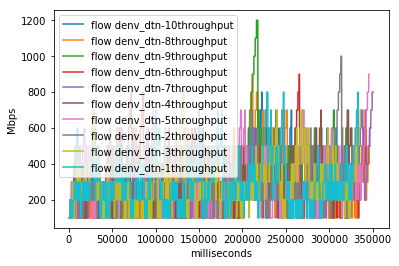

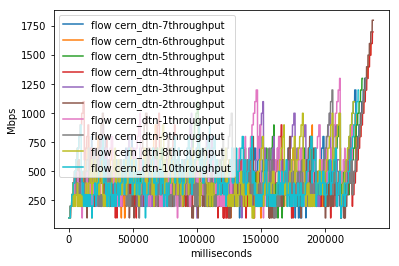

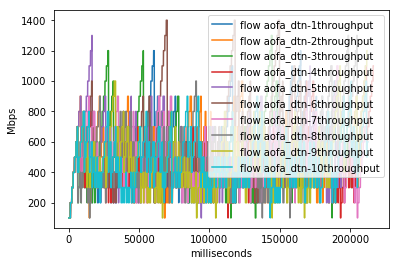

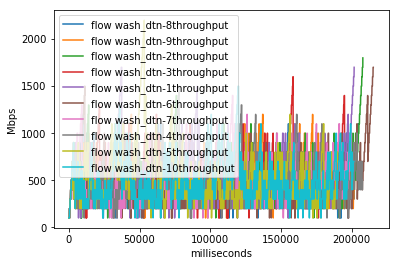

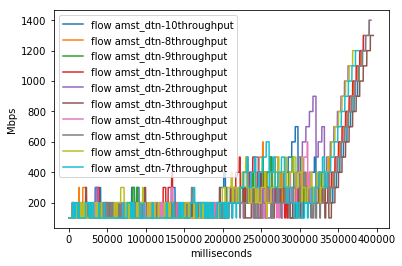

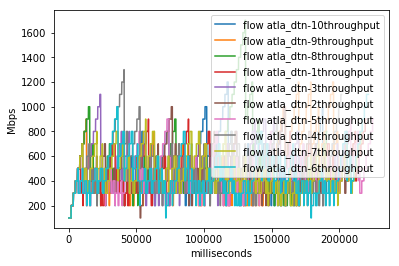

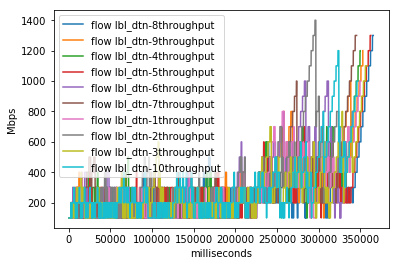

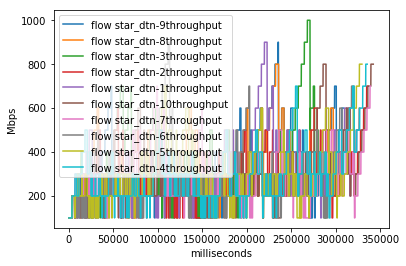

In [65]:
for endpoint_flows in all_flows.values():
    for flow in endpoint_flows.values():
        flow.plot_receive()
topo.show_plots()

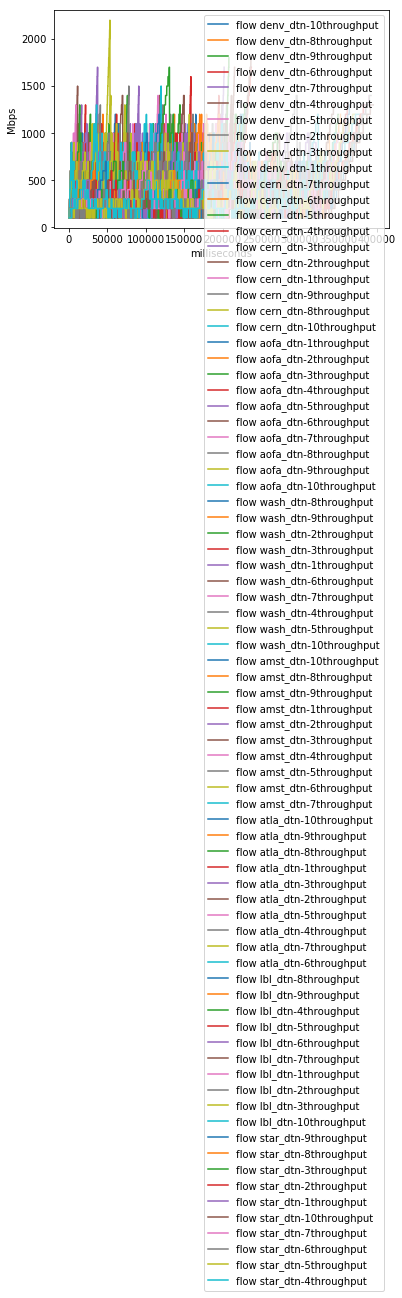

In [66]:
for endpoint_flows in all_flows.values():
    for flow in endpoint_flows.values():
        flow.plot_receive()
topo.show_plots()